In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn import metrics
from IPython.core.display import HTML
import matplotlib.pyplot as plt

In [164]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from IPython.core.display import HTML
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import metrics

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns

In [192]:
from sklearn import tree
from sklearn import metrics
from IPython.core.display import HTML
import matplotlib.pyplot as plt

In [52]:
#Random Forest
#1 Make sure all predictors are indicators. 

crime = pd.read_csv("/Users/ridhimasaxena/Desktop/BigDataAnalytics/FinalProject/BCD_Grouped.csv")

/Users/ridhimasaxena/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [96]:
crime.head()

,Unnamed: 0,Unnamed: 0.1,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,SEASON,DAY_OF_WEEK,TIME_OF_DAY,STREET,Lat,Long,Location
0,1,2,S97333701,3301,VERBAL DISPUTE,6,0.0,7/18/20 14:34,2020,1,7,3,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
1,2,3,S47513131,2647,THREATS TO DO BODILY HARM,12,0.0,6/24/20 10:15,2020,2,4,2,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
2,3,4,I92102201,3301,VERBAL DISPUTE,11,0.0,12/20/19 3:08,2019,4,6,1,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
3,4,5,I92097173,3115,INVESTIGATE PERSON,7,0.0,10/23/19 0:00,2019,4,4,5,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
4,5,6,I92094519,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,9,0.0,11/22/19 7:50,2019,4,6,2,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"


In [91]:
crime.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'SHOOTING', 'OCCURRED_ON_DATE',
       'YEAR', 'SEASON', 'DAY_OF_WEEK', 'HOUR', 'STREET', 'Lat', 'Long',
       'Location'],
      dtype='object')

In [92]:
crime.columns = ['Unnamed: 0', 'Unnamed: 0.1', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'SHOOTING', 'OCCURRED_ON_DATE',
       'YEAR', 'SEASON', 'DAY_OF_WEEK', 'TIME_OF_DAY', 'STREET', 'Lat', 'Long',
       'Location']

In [61]:
#Cast as Numeric - District
crime['DISTRICT'].replace('C6',6, inplace =True)
crime['DISTRICT'].replace('E18',12,inplace =True)
crime['DISTRICT'].replace ('E13',11,inplace =True)
crime['DISTRICT'].replace('C11',7,inplace =True)
crime['DISTRICT'].replace('D14',9,inplace =True)
crime['DISTRICT'].replace('B2',4,inplace =True)
crime['DISTRICT'].replace('A15',2,inplace =True)
crime['DISTRICT'].replace ('E5',10,inplace =True)
crime['DISTRICT'].replace('A1',1,inplace =True)
crime['DISTRICT'].replace('B3',5,inplace =True)
crime['DISTRICT'].replace('A7',3,inplace =True)
crime['DISTRICT'].replace('D4',8,inplace =True)
crime['DISTRICT'].replace(np.nan,13,inplace =True)
crime['DISTRICT'].replace('External',0,inplace =True)

In [63]:
crime['DISTRICT'].unique()

array([ 6, 12, 11,  7,  9,  4,  2, 10,  1,  5,  3,  8, 13,  0])

In [83]:
#Cast as Numeric - Shooting

crime['SHOOTING'].replace('Y',1,inplace =True)
crime['SHOOTING'].replace('N',0,inplace =True)
crime['SHOOTING'].replace('UNK',0.5,inplace =True)

In [84]:
crime['SHOOTING'].unique()


array([0. , 0.5, 1. ])

In [85]:
#Cast as Numeric - SEASON

crime['SEASON'].replace('Winter',1,inplace =True)
crime['SEASON'].replace('Spring',2,inplace =True)
crime['SEASON'].replace('Summer',3,inplace =True)
crime['SEASON'].replace('Fall',4,inplace =True)

In [86]:
crime['SEASON'].unique()

array([1, 2, 4, 3])

In [88]:
#Cast as Numeric - Day of the Week

crime['DAY_OF_WEEK'].replace('Sunday',1,inplace =True)
crime['DAY_OF_WEEK'].replace('Monday',2,inplace =True)
crime['DAY_OF_WEEK'].replace('Tuesday',3,inplace =True)
crime['DAY_OF_WEEK'].replace('Wednesday',4,inplace =True)
crime['DAY_OF_WEEK'].replace('Thursday',5,inplace =True)
crime['DAY_OF_WEEK'].replace('Friday',6,inplace =True)
crime['DAY_OF_WEEK'].replace('Saturday',7,inplace =True)

In [89]:
crime['DAY_OF_WEEK'].unique()

array([7, 4, 6, 3, 5, 1, 2])

In [94]:
#Cast as Numeric - Time of the Day

crime['TIME_OF_DAY'].replace('Early Morning',1,inplace =True)
crime['TIME_OF_DAY'].replace('Morning',2,inplace =True)
crime['TIME_OF_DAY'].replace('Afternoon',3,inplace =True)
crime['TIME_OF_DAY'].replace('Evening',4,inplace =True)
crime['TIME_OF_DAY'].replace('Night',5,inplace =True)

In [95]:
crime['TIME_OF_DAY'].unique()

array([3, 2, 1, 5, 4])

In [97]:
#Select Features to train the model

crime_new = crime[['DISTRICT','SHOOTING','SEASON','DAY_OF_WEEK', 'TIME_OF_DAY']]

In [200]:
crime_new.head()

,Unnamed: 0,DISTRICT,SHOOTING,SEASON,DAY_OF_WEEK,TIME_OF_DAY,SEVERE,POPULATION
0,0,6,0.0,1,7,3,1,32547
1,1,12,0.0,2,4,2,1,29219
2,2,11,0.0,4,6,1,1,36866
3,3,7,0.0,4,4,5,1,134101
4,4,9,0.0,4,6,2,1,38839


In [138]:
crime_new.to_csv(r'/Users/ridhimasaxena/Desktop/BigDataAnalytics/FinalProject/BCD_categorical.csv')

In [214]:
crime_new = pd.read_csv("/Users/ridhimasaxena/Desktop/BigDataAnalytics/FinalProject/BCD_categorical_Class.csv")

In [228]:
crime_new = crime_new[['DISTRICT','SHOOTING','SEASON','DAY_OF_WEEK', 'TIME_OF_DAY','SEVERE','POPULATION']]

In [229]:
crime_new.head()

,DISTRICT,SHOOTING,SEASON,DAY_OF_WEEK,TIME_OF_DAY,SEVERE,POPULATION
0,6,0.0,1,7,3,1,32547
1,12,0.0,2,4,2,0,29219
2,11,0.0,4,6,1,0,36866
3,7,0.0,4,4,5,0,134101
4,9,0.0,4,6,2,1,38839


In [99]:
crime_new['SEVERE'] = 1

<ipython-input-99-91b57e542683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_new['SEVERE'] = 1


In [230]:
X_train, X_test, y_train, y_test = train_test_split(crime_new.drop(['SEVERE'], axis='columns'), crime_new['SEVERE'], test_size=0.3, random_state=7000, shuffle=True)

In [231]:
crime_new.dtypes

DISTRICT         int64
SHOOTING       float64
SEASON           int64
DAY_OF_WEEK      int64
TIME_OF_DAY      int64
SEVERE           int64
POPULATION       int64
dtype: object

In [232]:
X_train.head()

,DISTRICT,SHOOTING,SEASON,DAY_OF_WEEK,TIME_OF_DAY,POPULATION
90330,6,0.5,4,1,1,32547
238192,6,0.5,1,5,3,32547
184510,11,0.5,4,2,2,36866
365334,6,0.5,4,7,2,32547
61760,4,0.5,1,7,3,24237


In [235]:
y_train.head()


90330     1
238192    1
184510    1
365334    1
61760     1
Name: SEVERE, dtype: int64

In [236]:
#Random Forest
randf = RandomForestClassifier(bootstrap = True, class_weight = "balanced", criterion = 'entropy',
                               max_depth=4, max_features ="auto", max_leaf_nodes = None,
                               min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=7000, verbose=0,
            warm_start=False)
randf = randf.fit(X_train, y_train)

In [237]:
randf

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=10, min_samples_split=20,
                       n_jobs=1, random_state=7000)

In [270]:
randf.feature_importances_

array([4.79076857e-03, 9.78788738e-01, 1.08941134e-02, 3.48177013e-04,
       4.97922661e-04, 4.68028004e-03])

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [239]:
randf.score(X_test,y_test)

0.9846814602720114

In [240]:
importances = randf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

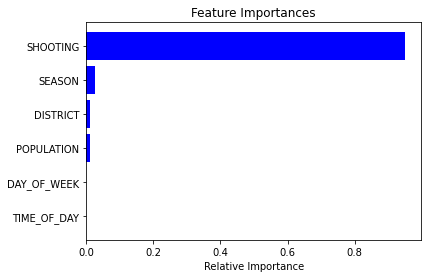

In [249]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [250]:

pred_test = randf.predict(X_test)
pred_test_prob = randf.predict_proba(X_test)

In [251]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

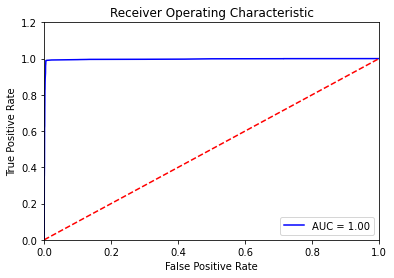

In [254]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [255]:

metrics.roc_auc_score(y_test, pred_test_prob[:,1])

0.9964722092984027

In [256]:
metrics.accuracy_score(y_test, pred_test)

0.9846814602720114

In [244]:
#GBM
gbm = GradientBoostingClassifier(max_depth=4, random_state=6001, n_estimators=100, verbose=1)
gbm = gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7300           44.97s
         2           0.6218           45.55s
         3           0.5412           48.75s
         4           0.4778           49.47s
         5           0.4256           47.46s
         6           0.3809           46.35s
         7           0.3432           45.60s
         8           0.3104           45.46s
         9           0.2823           44.89s
        10           0.2581           44.75s
        20           0.1255           38.76s
        30           0.0817           41.42s
        40           0.0660           34.62s
        50           0.0596           28.09s
        60           0.0574           22.35s
        70           0.0556           16.48s
        80           0.0544           11.00s
        90           0.0535            5.51s
       100           0.0529            0.00s


In [245]:
gbm.feature_importances_

array([1.19584216e-02, 9.50684563e-01, 2.52631715e-02, 2.69953838e-04,
       5.00550850e-05, 1.17738354e-02])

In [247]:
importances = gbm.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

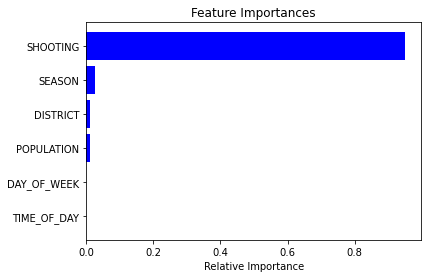

In [248]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [257]:

pred_test = gbm.predict(X_test)
pred_test_prob = gbm.predict_proba(X_test)

In [258]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

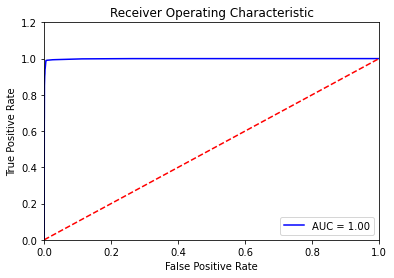

In [260]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [261]:
metrics.roc_auc_score(y_test, pred_test_prob[:,1])

0.998832444640957

In [262]:
metrics.accuracy_score(y_test, pred_test)

0.9912329140675598

In [263]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [264]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/ridhimasaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [266]:
#Predicting Severity 
model.predict(np.array([[6,0,1,7,3,10000]]))[0]

0

In [267]:
#Scoring the Model

model.score(X_test,y_test)

0.952735453522855

In [165]:
##SVM
cls = svm.SVC(kernel ="linear")


In [166]:
cls.fit(X_train, y_train)

ValueError: The number of classes has to be greater than one; got 1 class

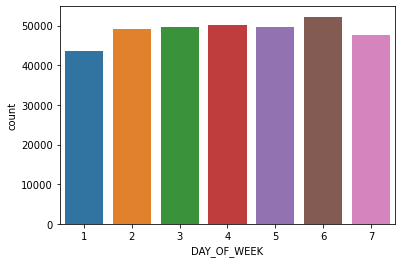

In [186]:
sns.countplot(X_train['DAY_OF_WEEK']);

In [193]:
dec_tree = tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train, y_train)

In [194]:
dec_tree

DecisionTreeClassifier()

In [195]:
pred_test = dec_tree.predict(X_test) # Predict the labels
pred_test_prob = dec_tree.predict_proba(X_test) # Predict the probabilities

In [196]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [197]:
pred_test

array([1, 1, 1, ..., 1, 1, 1])

In [198]:
pred_test_prob

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])